### **1. 데이터 불러오기**
  * 라이브러리 설치 및 import
    1. Pandas: 데이터 처리 <br>
    2. matplotlib.pyplot: graph visualization <br>
    3. seaborn: heatmap 제작
  * 파일 import (경로 지정 -> 파일 불러오기)

In [62]:
# 1. 라이브러리 설치 (처음 한 번만)
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install kagglehub

# 2. 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# 3. Kaggle 데이터셋 다운로드
path = kagglehub.dataset_download("pranjalyadav92905/titanic-eda-data")
print("Dataset saved to:", path)

# 4. CSV 파일 경로 구성
csv_path = os.path.join(path, "titanic.csv")

# 5. CSV 불러오기
df = pd.read_csv(csv_path)

Dataset saved to: /Users/wonuseo/.cache/kagglehub/datasets/pranjalyadav92905/titanic-eda-data/versions/1


### **2. 데이터 크기 확인**
- Rows: 데이터 개수
- Columns: features 종류
- df.columns: 종류들의 이름...
- df.types: 각 데이터들의 저장방식?

In [63]:
# 데이터 크기 확인
print("(Rows, Columns) = ", df.shape)
print("Rows = ",df.shape[0])
print("Columns = ",df.shape[1])

# column head 추출
print(df.columns)
print(df.dtypes)
df.head()

(Rows, Columns) =  (891, 12)
Rows =  891
Columns =  12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. column별 null 값 확인
1. 데이터 개수 확인
2. df.isnull().sum() -> isnull을 통해 결측치인 경우 True=1을 출력 -> sum()을 통해 합산하여 확인하는 방식
    - true = 1, false = 0 으로 true 값을 더함
3. 여기서 " . "으로 연결하는 것은 method chaining으로 좌측 명력어부터 순차적으로 실행

In [64]:
# 전체 집합 확인
print("데이터 개수: ", df.shape[0])

# null값(결측치) 파악
print(df.isnull().sum())

데이터 개수:  891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 4. 성별 Column의 통계치 파악, Bar Plot으로 그려보기
- value_counts(): 고유값이 몇 번 나왔는지 확인

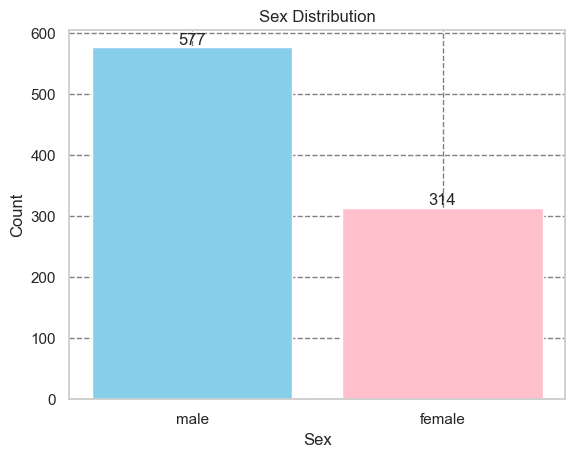

Sex
male      577
female    314
Name: count, dtype: int64


In [65]:
# 1. 데이터 준비
counts = df['Sex'].value_counts()
labels = counts.index #Male, Female
values = counts.values #577, 314

# 2. bar 그래프 그리기
plt.bar(labels, values, color=['skyblue', 'pink']) #plt.bar(x, y, 디자인)

# 3. 제목과 라벨
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

# 4. 보조선 + 눈금
plt.grid(True, linestyle='--', linewidth=1.0, color='gray')
plt.yticks(range(0, int(counts.max()) + 100, 100))

# 5. 막대 위에 숫자 표시
for i in range(len(values)):
    plt.text(i, values[i] + 5, str(values[i]), ha='center') #plt.text(x, y, data, 정렬)

# 6. 그래프 출력
plt.show()
print(counts)

### 5. Age 평균 파악
- f"{값: 2f}"를 통해 소수점 컨트롤
- df['Age'].mean() : dataframe에서 Age의 평균을 구해라

In [66]:
# 평균 Age 계산. 소숫점 둘째 자리까지

print(f"평균 Age: {df['Age'].mean():.2f}")

평균 Age: 29.70


### 6. Fare와 Age의 상관관계 분석
- Scatter Plot
    - 양의 상관관계(나이가 많을수록 fare가 높다): 우**상**향 모양으로 점들 결집
    - 음의 상관관계(나이가 많을수록 fare가 높다): 우**하**향 모양으로 점들 결집
- Correlation : corr()

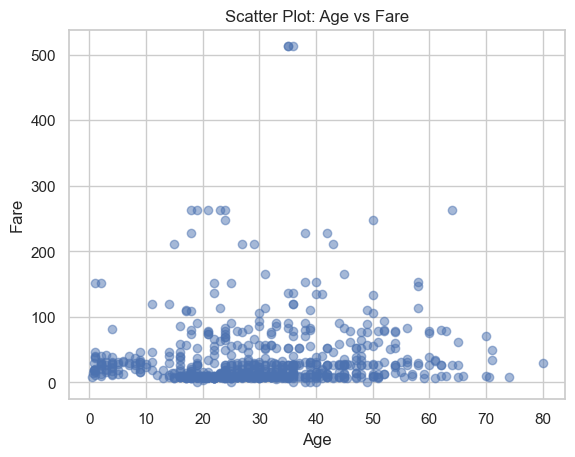

Fare와 Age의 상관계수: 0.10


In [67]:
# Scatter Plot 작성
plt.scatter(df['Age'], df['Fare'], alpha=0.5) #plt.scatter(x, y, design)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.grid(True)
plt.show()

# 상관관계 분석
# corr 변수를 Age와 Fare 두 개를. corr를 본다. 2x2 Matrix
corr = df[['Age', 'Fare']].corr().iloc[0, 1]
print(f"Fare와 Age의 상관계수: {corr:.2f}")

/var/folders/28/761115bx55q0bkv5lvth1sgc0000gn/T/ipykernel_3969/3907438023.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_age_and_fare.groupby('age_group')[['Age', 'Fare']].mean().reset_index()


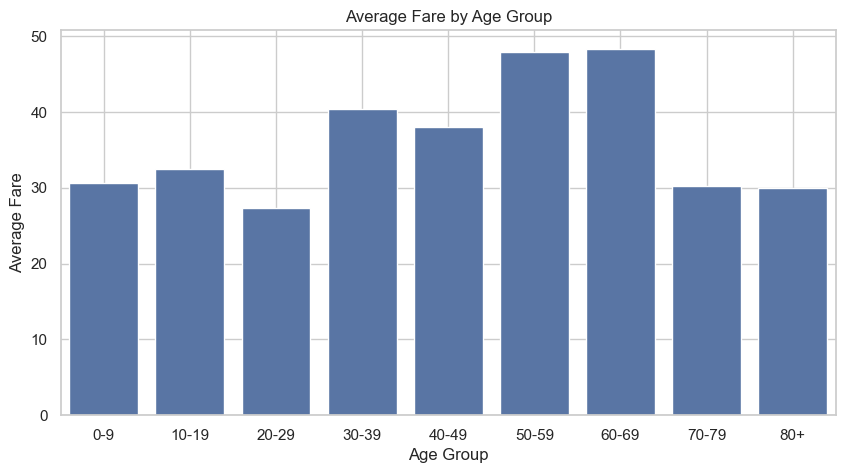

📌 그룹 평균 기준 상관계수 (age vs fare): 0.25


In [68]:
# age, fare 열 중 null값 제거
df_age_and_fare = df[['Age', 'Fare']].dropna()

# 10세 단위로 age 그룹핑 (0–10, 11–20, ..., 80+)
bins = list(range(0, 81, 10)) + [150]  # 150세 이상은 마지막 그룹으로 처리
labels = [f'{i}-{i+9}' for i in range(0, 80, 10)] + ['80+']
df_age_and_fare['age_group'] = pd.cut(df_age_and_fare['Age'], bins=bins, labels=labels, right=False)

# 각 그룹별 평균 age와 평균 fare 계산
grouped = df_age_and_fare.groupby('age_group')[['Age', 'Fare']].mean().reset_index()

# 시각화: age_group별 fare 평균
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped, x='age_group', y='Fare')
plt.title('Average Fare by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Fare')
plt.grid(True)
plt.show()

# 상관계수 계산 (평균 age vs 평균 fare)
correlation = grouped['Age'].corr(grouped['Fare'])
print(f"📌 그룹 평균 기준 상관계수 (age vs fare): {correlation:.2f}")

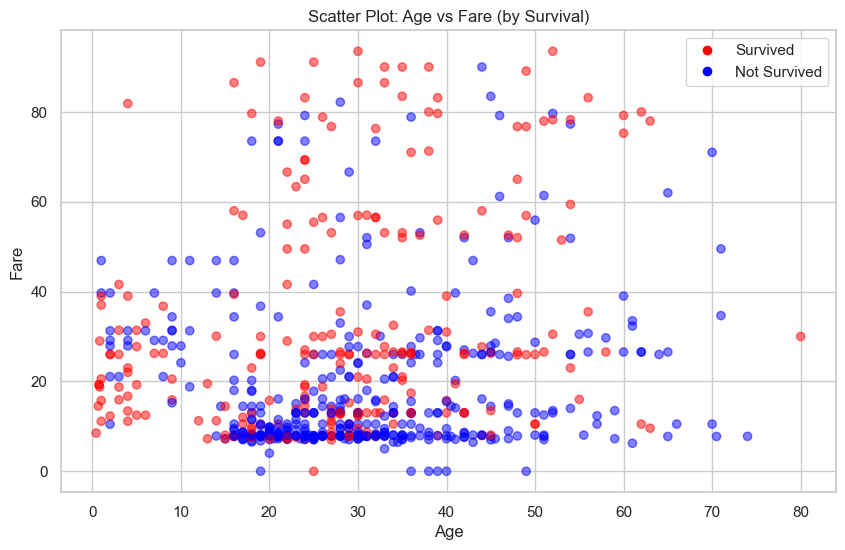

📌 Fare와 Age의 상관계수: 0.16


In [69]:
# 필요한 컬럼만 선택하고 결측치 제거
df_a_and_f_and_s = df[['Age', 'Fare', 'Survived']].dropna()
df_a_and_f_and_s = df[df['Fare'] <= 100]

# 색상 설정: 생존 여부에 따라 색상 다르게
colors = df_a_and_f_and_s['Survived'].map({1: 'red', 0: 'blue'})

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_a_and_f_and_s['Age'], df_a_and_f_and_s['Fare'], c=colors, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare (by Survival)')
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Survived', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Survived', markerfacecolor='blue', markersize=8)
])
plt.show()

# 상관계수 계산
corr = df_a_and_f_and_s[['Age', 'Fare']].corr().iloc[0, 1]
print(f"📌 Fare와 Age의 상관계수: {corr:.2f}")

### 7. Ticket unique value 파악
- 전체 집합: df.shape[0]
- unique value: df['Ticket'].nunique()
    - nunique(): 고유 개수
    - unique(): 고유 값 목록
    - value_counts(): 각 값 개수 (sex bar plot 제작시 활용)

In [70]:
print("Rows 개수: ", df.shape[0])

#Unique value의 값 개수 확인
print("고유 개수: ", df['Ticket'].nunique())

print("공유 티켓 수: ", df.shape[0]-df['Ticket'].nunique())

print("Ticket")

Rows 개수:  891
고유 개수:  681
공유 티켓 수:  210
Ticket


### 8-2. Survival & 여러 값 상관관계 분석

#### ✅ 가설 요약 및 검토

| Feature   | 가설 내용 | 결과 해석 | 결론 |
|-----------|-----------|------------|-------|
| **Pclass** | Passenger's class가 높을수록 생존 | Pclass가 낮을수록 생존률 높음 (1등석 > 2등석 > 3등석) | ✅ True |
| **Sex** | 여성이 생존률이 더 높다 | 여성 생존률이 남성보다 월등히 높음 | ✅ True |
| **Age** | 나이가 어릴수록 생존률이 높다 | 0–10세 생존률이 높음<br>11–60세는 큰 차이 없음<br>61세 이상은 생존률이 길게 뽑힘 (추가 분석 필요) | ⚠️ Partially True |
| **SibSp** | 형제자매/배우자가 많을수록 생존 | 단일 탑승보다 생존률이 다소 높음 (세부 확인 필요) | 🔍 확인 필요 |
| **Parch** | 부모/자녀가 많을수록 생존 | 유사하게 단독보다 생존률이 높을 수 있음 | 🔍 확인 필요 |
| **TicketGroupSize** | 같은 티켓을 공유한 인원이 많을수록 생존 | 일부 유의미한 경향 존재 | 🔍 확인 필요 |
| **Fare** | 비싼 요금을 지불한 사람일수록 생존 | Pclass와 유사한 경향성 보임 | ✅ True |

---

#### ❌ 의미 없는 (또는 신뢰 어려운) 가설

| Feature | 가설 내용 | 결론 |
|---------|-----------|-------|
| **Name** | 이름 길이가 길수록 생존률이 높다 | ❌ 의미 없음 |
| **Cabin** | 선실 정보 기반 예측 가능성 | ❌ 결측치 너무 많아 불가능 |
| **Embarked** | 탑승 위치에 따라 생존률이 달라진다 | ❌ 의미 없음 (명확한 상관 없음) |

---

#### 📌 추가 참고 사항
- **Age**와 관련된 상관관계는 0–10세 구간에서만 뚜렷하게 관찰됨
- **Fare**는 금액 자체보다는 `Pclass`의 대표값처럼 작동
- **Sex**는 생존에 가장 강력한 변수 중 하나로 판단됨


전체 생존 비율: 38.38%


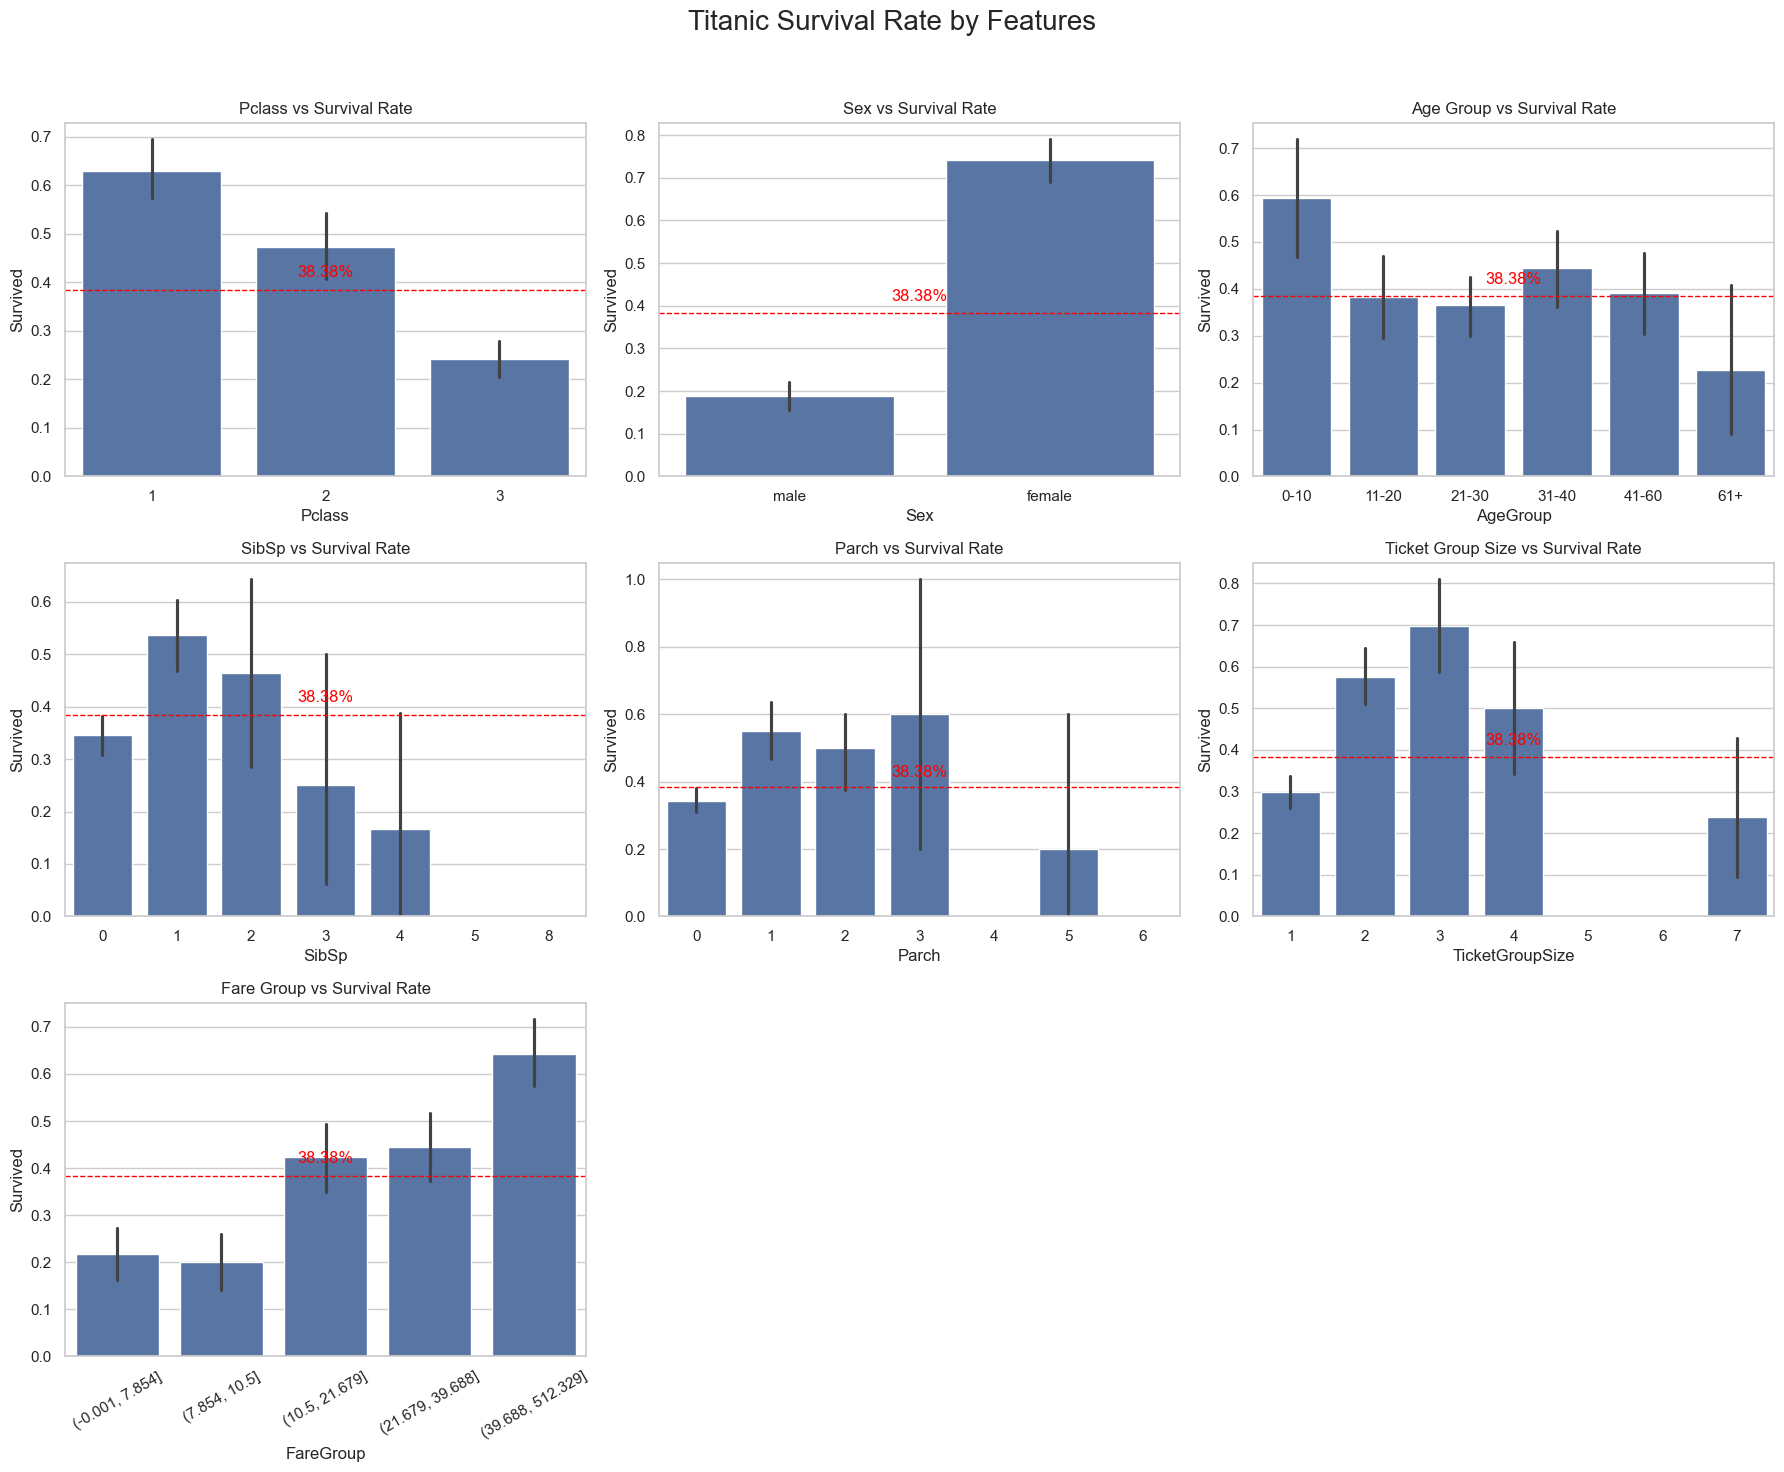

In [71]:
# 전체 생존 비율 계산
survival_rate = df['Survived'].mean()

# 시각화 스타일
sns.set(style="whitegrid")

print(f"전체 생존 비율: {survival_rate:.2%}")

# Age Group 구간 생성
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 60, 80], labels=['0-10','11-20','21-30','31-40','41-60','61+'])

# Fare Group 구간 생성
df['FareGroup'] = pd.qcut(df['Fare'], 5)

# Ticket 그룹 크기 계산
df['TicketGroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')

# 그래프 출력
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Titanic Survival Rate by Features", fontsize=20)

# 공통 기준선 함수
def add_baseline(ax):
    ax.axhline(survival_rate, color='red', linestyle='--', linewidth=1)
    ax.text(0.5, survival_rate + 0.02, f"{survival_rate:.2%}", color='red', ha='center', va='bottom', transform=ax.get_yaxis_transform())

# 1. Pclass
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Pclass vs Survival Rate")
add_baseline(axes[0, 0])

# 2. Sex
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Sex vs Survival Rate")
add_baseline(axes[0, 1])

# 3. Age
sns.barplot(x='AgeGroup', y='Survived', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Age Group vs Survival Rate")
add_baseline(axes[0, 2])

# 4. SibSp
sns.barplot(x='SibSp', y='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title("SibSp vs Survival Rate")
add_baseline(axes[1, 0])

# 5. Parch
sns.barplot(x='Parch', y='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Parch vs Survival Rate")
add_baseline(axes[1, 1])

# 6. Ticket Group Size
sns.barplot(x='TicketGroupSize', y='Survived', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Ticket Group Size vs Survival Rate")
add_baseline(axes[1, 2])

# 7. Fare Group
sns.barplot(x='FareGroup', y='Survived', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Fare Group vs Survival Rate")
axes[2, 0].tick_params(axis='x', rotation=30)
add_baseline(axes[2, 0])

# 나머지 subplot 비우기
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


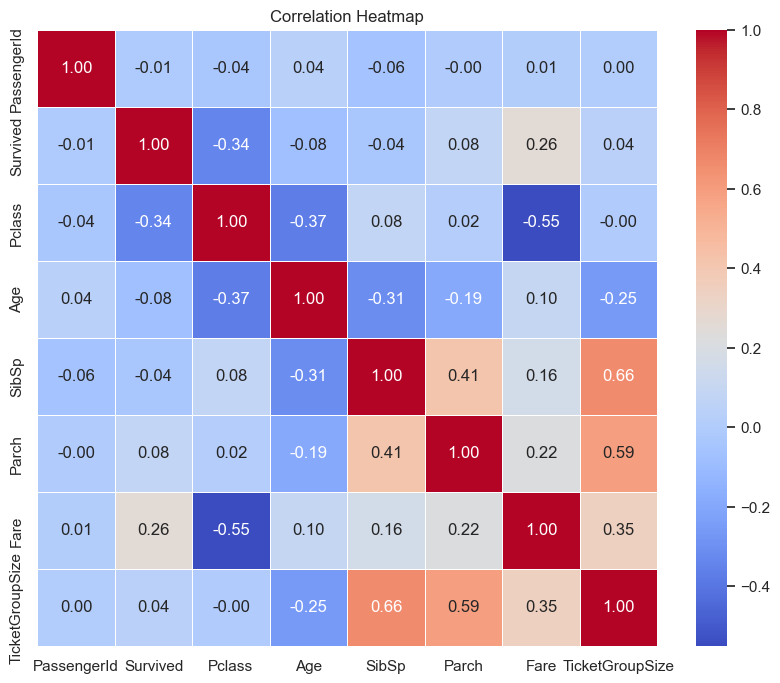

In [72]:
# 수치형 변수들 간 상관계수 행렬
corr_matrix = df.corr(numeric_only=True)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 9-1. 데이터 심층 분석
- 시작점: 타이타닉 호에 타고 있는 동승자가 있는 승객은 생존확률이 비슷할 것이다.
- Ticket, SibSp, Parch 해석하기
    - 동일한 Ticket을 갖고 있다 = 같이 예약했다 = 서로 아는 사이 (가족, 연인, 직장 동료 등)
    - SibSp = 동일한 Ticket을 갖고 있지 않아도 가족 여부 파악에 도움
    - Parch = 동일한 Ticket을 갖고 있지 않아도 가족 여부 파악에 데 도움

In [73]:
# 동일한 Ticket 사용 인원 확인
print("중복 티켓 사용 인원 수")
# 1. 티켓별 사용 인원 수
ticket_counts = df['Ticket'].value_counts()

# 2. 각 티켓당 '사용된 인원 수'별로 몇 개의 티켓이 있었는지
group_size_distribution = ticket_counts.value_counts().sort_index()

# 3. 인원 수로 다시 풀어 쓰기
for group_size, ticket_count in group_size_distribution.items():
    total_people = group_size * ticket_count
    print(f"{group_size}명 중복된 티켓: {ticket_count}개 → 총 {total_people}명")

# SibSp 확인
print("\n방계혈족 & 배우자 인원수")
print(df['SibSp'].unique())

sibsp_counts = df['SibSp'].value_counts().sort_index()

for sibsp, count in sibsp_counts.items():
    print(f"방계혈족 및 배우자가 총 {sibsp}명인 승객 수: {count}명") #여기서 동행자는 Siblings or Spouse

# Parch 확인
print("\n직계혈족 인원 수")
print(df['Parch'].unique())

parch_counts = df['Parch'].value_counts().sort_index()

for parch, count in parch_counts.items():
    print(f"직계혈족이 {parch}명인 승객 수: {count}명") #여기서 동행자는 Parents or Children

중복 티켓 사용 인원 수
1명 중복된 티켓: 547개 → 총 547명
2명 중복된 티켓: 94개 → 총 188명
3명 중복된 티켓: 21개 → 총 63명
4명 중복된 티켓: 11개 → 총 44명
5명 중복된 티켓: 2개 → 총 10명
6명 중복된 티켓: 3개 → 총 18명
7명 중복된 티켓: 3개 → 총 21명

방계혈족 & 배우자 인원수
[1 0 3 4 2 5 8]
방계혈족 및 배우자가 총 0명인 승객 수: 608명
방계혈족 및 배우자가 총 1명인 승객 수: 209명
방계혈족 및 배우자가 총 2명인 승객 수: 28명
방계혈족 및 배우자가 총 3명인 승객 수: 16명
방계혈족 및 배우자가 총 4명인 승객 수: 18명
방계혈족 및 배우자가 총 5명인 승객 수: 5명
방계혈족 및 배우자가 총 8명인 승객 수: 7명

직계혈족 인원 수
[0 1 2 5 3 4 6]
직계혈족이 0명인 승객 수: 678명
직계혈족이 1명인 승객 수: 118명
직계혈족이 2명인 승객 수: 80명
직계혈족이 3명인 승객 수: 5명
직계혈족이 4명인 승객 수: 4명
직계혈족이 5명인 승객 수: 5명
직계혈족이 6명인 승객 수: 1명


### 9-2. 가족 단위 Grouping을 통한 생존률 확인
- Emily Hocking(438)의 가족
    - **단서**
        - Ticket # = 29106
        - SibSp = 2
        - Parch = 3

---

#### 1) 단서

| 항목      | 값     |
|-----------|-------|
| Ticket #  | 29106 |
| SibSp     | 2     |
| Parch     | 3     |

---

#### 2) Ticket # 기반 가족 구성원

| 이름                             | Passenger ID | 역할 | 근거                      |
|----------------------------------|--------------|------|---------------------------|
| Richards, Master. William Rowe   | 408          | 아들 | Ticket 29106, Parch = 1   |
| Richards, Master. George Sibley  | 832          | 아들 | Ticket 29106, Parch = 1   |

**결론**
- Parch 3명 중 **2명은 아들**
- SibSp 2명은 **형제자매** (배우자 미탑승)

---

#### 3) 이름 기반 가족 구성원

| 이름                                         | Ticket # | 역할   | 근거                                          |
|----------------------------------------------|----------|--------|-----------------------------------------------|
| Hocking, Mrs. Elizabeth (Eliza Needs)        | 29105    | 어머니 | 성씨 공유 & 연속된 Ticket 번호 / Parch = 1     |
| Hocking, Mr. Richard George                  | 29105    | 남동생 | 성씨 공유 & 연속된 Ticket 번호 / SibSp = 2     |

**결론**
- Parch 3명 = 어머니 1명 + 자녀 2명
- SibSp 2명 = 남동생 1명 + 추가 형제자매 1명 가능성


In [74]:
df[df['Name'].str.contains("Hocking|Richard", case=False, na=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,TicketGroupSize
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.00,0,0,A/4. 39886,7.8000,NaN,S,21-30,"(-0.001, 7.854]",1
102,103,0,1,"White, Mr. Richard Frasar",male,21.00,0,1,35281,77.2875,D26,S,21-30,"(39.688, 512.329]",2
135,136,0,2,"Richard, Mr. Emile",male,23.00,0,0,SC/PARIS 2133,15.0458,NaN,C,21-30,"(10.5, 21.679]",1
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,0-10,"(21.679, 39.688]",2
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.00,1,1,11751,52.5542,D35,S,31-40,"(39.688, 512.329]",2
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,NaN,"(21.679, 39.688]",1
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S,0-10,"(10.5, 21.679]",3
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S,11-20,"(10.5, 21.679]",2
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.7500,NaN,S,21-30,"(10.5, 21.679]",3
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.00,1,0,3460,7.0458,NaN,S,21-30,"(-0.001, 7.854]",1


### 9-3. 데이터 혼합 기반 가설 설정

- **데이터를 섞어 본다면...**
    - Possible Scenarios: 혼자 탔거나 가족 단위로 뭉쳐 있었을 가능성
        - Case 1) 가족 전체가 생존
        - Case 2) 가족 중 일부(여성, 아이)만 생존
        - Case 3) 가족 전체가 사망
        - Case 4) 혼자 탑승했을 경우:
            - 생존에 불리했을까? 유리했을까? 혹은 무관했을까?

---

- **가설로 정리해본다면...**

#### ✅ [가설 1]
**가족 구성원 중 여성이나 아동이 포함된 그룹은 생존률이 유의하게 높다**

- 📌 아이가 있는 경우:
    - 아이가 포함된 그룹의 생존률은 높은가?
    - 아이만 생존한 경우는?
    - 아이와 여성 모두 생존한 경우는?
- 📌 여성이 있는 경우:
    - 여성 포함 그룹의 생존률은 높은가?
    - 여성만 생존한 경우는?
- 📌 반례:
    - 아이와 여성이 없어도 높은 생존률을 보인 경우?
    - 아이와 여성이 모두 있었지만 남성만 생존한 경우?

---

#### ✅ [가설 2]
**가족 단위로 함께 탑승했더라도, 모두 생존하거나 모두 사망한 경향이 높다**

- 동일한 Ticket을 공유한 그룹 내에서 생존 결과의 일치율은 높은가?
- 그룹 내 생존자/비생존자 수의 분산은 낮은가?

---

#### ✅ [가설 3]
**혼자 탑승한 승객의 생존률은 사회적 기준(성별, 나이)에 따라 다르게 영향을 받는다**

- 혼자 탑승한 여성/아동의 생존률은 어떤가?
- 혼자 탑승한 남성의 생존률은 어떤가?
- 나이대별로 단독 탑승 시 생존률 차이는 나타나는가?


In [75]:
import os

os.makedirs("assets", exist_ok=True)

/var/folders/28/761115bx55q0bkv5lvth1sgc0000gn/T/ipykernel_3969/4097885117.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = solo.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['count', 'sum', 'mean']).reset_index()


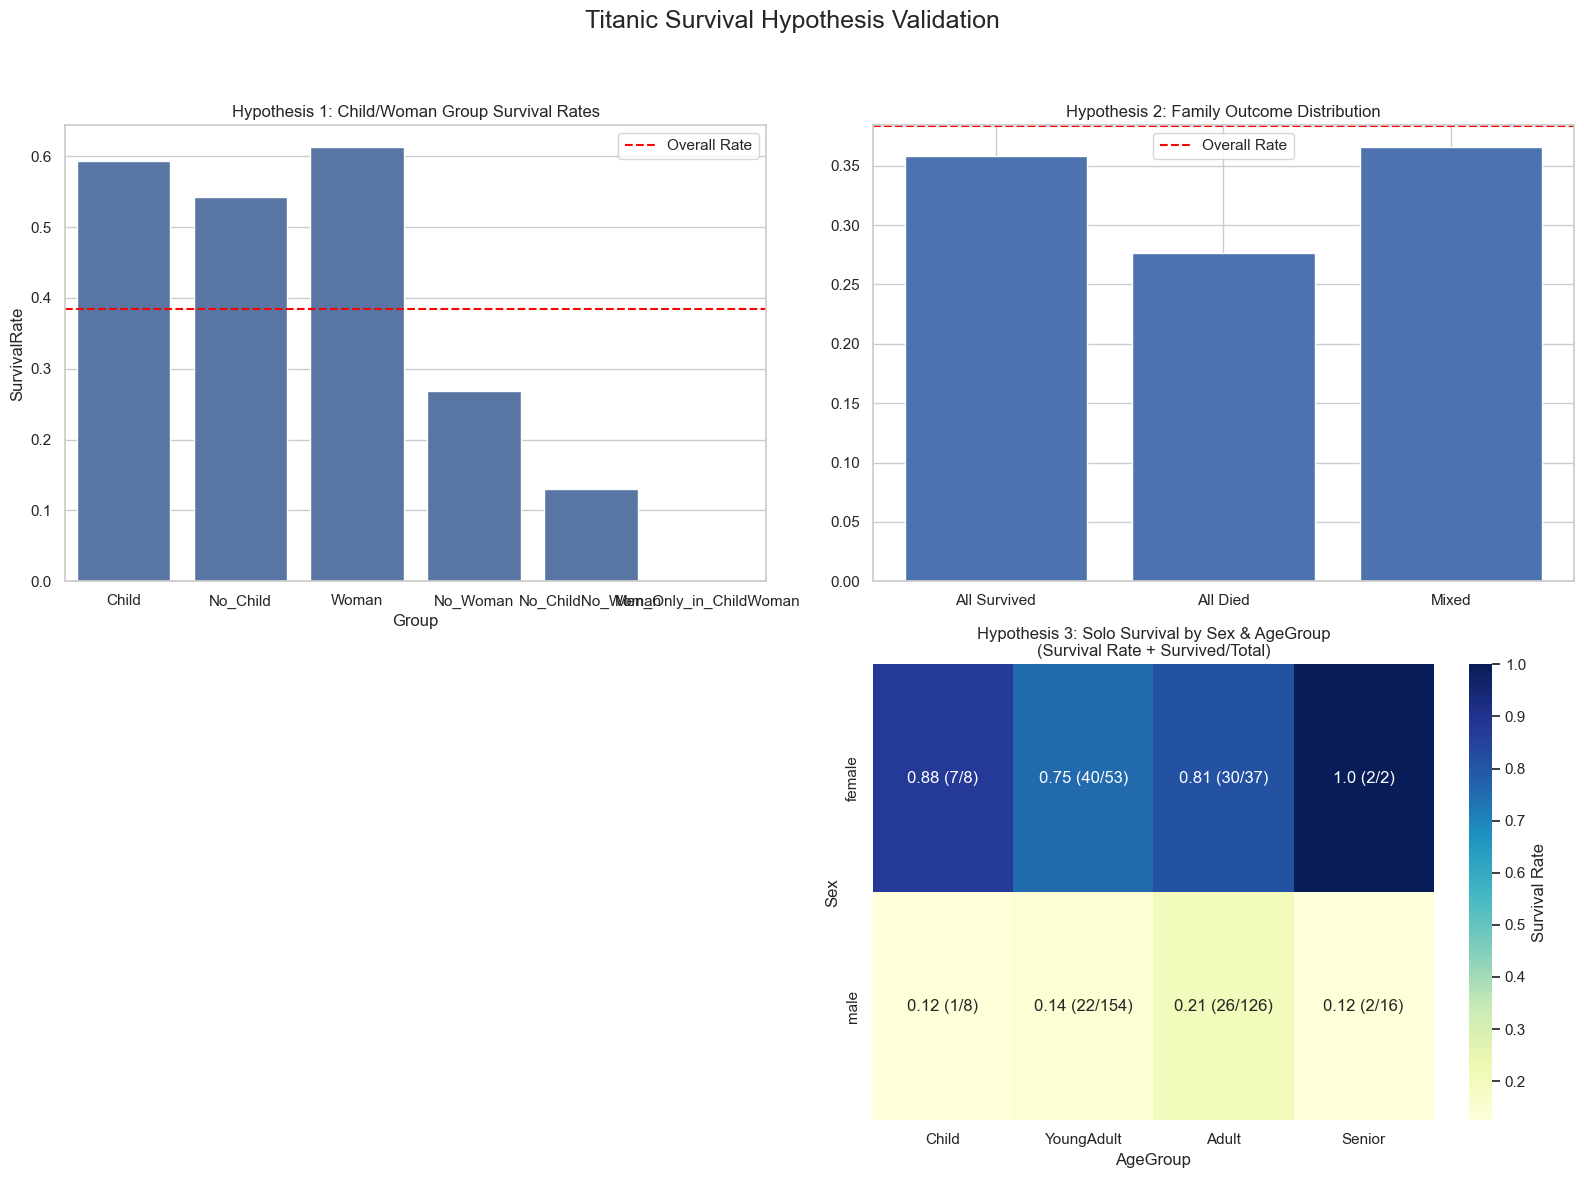

In [76]:
# 2. 파생 변수 생성
df['IsChild'] = df['Age'] < 16
df['IsWoman'] = df['Sex'] == 'female'
df['FamilySize'] = df['SibSp'] + df['Parch']

# 3. 전체 생존 비율 가이드라인
overall_survival = df['Survived'].mean()

# 4. 가족 단위만 추출 (2명 이상 그룹)
family_groups = df.groupby('Ticket').filter(lambda g: len(g) > 1).groupby('Ticket')

# 5. 가족별 통계 계산
records = []
for ticket, grp in family_groups:
    total = len(grp)
    surv = grp['Survived'].sum()
    rate = surv / total
    has_child = grp['IsChild'].any()
    has_woman = grp['IsWoman'].any()
    survivors = grp[grp['Survived'] == 1]
    records.append({
        'Ticket': ticket,
        'Total': total,
        'SurvivedCount': surv,
        'SurvivalRate': rate,
        'HasChild': has_child,
        'HasWoman': has_woman,
        'OnlyChildrenSurvived': len(survivors) > 0 and survivors['IsChild'].all() and not survivors['IsWoman'].any(),
        'OnlyWomenSurvived': len(survivors) > 0 and survivors['IsWoman'].all() and not survivors['IsChild'].any(),
        'ChildrenAndWomenSurvived': len(survivors) > 0 and survivors['IsChild'].any() and survivors['IsWoman'].any(),
        'OnlyMenSurvived': len(survivors) > 0 and not survivors['IsChild'].any() and not survivors['IsWoman'].any()
    })
family_stats = pd.DataFrame(records)

# === 가설 1: 여성/아동 포함 그룹 생존률 비교 ===
rates_h1 = {
    'Child': family_stats[family_stats['HasChild']]['SurvivalRate'].mean(),
    'No_Child': family_stats[~family_stats['HasChild']]['SurvivalRate'].mean(),
    'Woman': family_stats[family_stats['HasWoman']]['SurvivalRate'].mean(),
    'No_Woman': family_stats[~family_stats['HasWoman']]['SurvivalRate'].mean(),
    'No_ChildNo_Woman': family_stats[~family_stats['HasChild'] & ~family_stats['HasWoman']]['SurvivalRate'].mean(),
    'Men_Only_in_ChildWoman': family_stats[family_stats['HasChild'] & family_stats['HasWoman']]['OnlyMenSurvived'].mean()
}

# === 가설 2: 가족 전체 생존/사망 비율 ===
hyp2_all_survived = (family_stats['SurvivedCount'] == family_stats['Total']).mean()
hyp2_all_died = (family_stats['SurvivedCount'] == 0).mean()
hyp2_mixed = 1 - hyp2_all_survived - hyp2_all_died

# === 가설 3: 혼자 탑승자의 생존률 (성별/나이) ===
solo = df[df['FamilySize'] == 0].copy()
solo['AgeGroup'] = pd.cut(solo['Age'], bins=[0,16,30,60,100], labels=['Child','YoungAdult','Adult','Senior'])

# 생존률, 총인원수, 생존자수 각각 계산
group_stats = solo.groupby(['Sex', 'AgeGroup'])['Survived'].agg(['count', 'sum', 'mean']).reset_index()
pivot_mean = group_stats.pivot(index='Sex', columns='AgeGroup', values='mean')
pivot_count = group_stats.pivot(index='Sex', columns='AgeGroup', values='count')
pivot_sum = group_stats.pivot(index='Sex', columns='AgeGroup', values='sum')

# 🔵 표기용 텍스트: "생존자수/총인원수"
annot = pivot_mean.fillna(0).round(2).astype(str) + " (" + \
        pivot_sum.fillna(0).astype(int).astype(str) + "/" + \
        pivot_count.fillna(0).astype(int).astype(str) + ")"

# 🔵 시각화
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Titanic Survival Hypothesis Validation", fontsize=18)

# Hypothesis 1 시각화
h1_df = pd.Series(rates_h1).rename_axis('Group').reset_index(name='SurvivalRate')
sns.barplot(x='Group', y='SurvivalRate', data=h1_df, ax=axes[0,0])
axes[0,0].axhline(overall_survival, color='red', linestyle='--', label='Overall Rate')
axes[0,0].set_title('Hypothesis 1: Child/Woman Group Survival Rates')
axes[0,0].legend()

# Hypothesis 2 시각화
axes[0,1].bar(['All Survived','All Died','Mixed'], [hyp2_all_survived, hyp2_all_died, hyp2_mixed])
axes[0,1].axhline(overall_survival, color='red', linestyle='--', label='Overall Rate')
axes[0,1].set_title('Hypothesis 2: Family Outcome Distribution')
axes[0,1].legend()

# Hypothesis 3 시각화
sns.heatmap(pivot_mean, annot=annot, fmt='', cmap="YlGnBu", ax=axes[1,1], cbar_kws={'label': 'Survival Rate'})
axes[1,1].set_title('Hypothesis 3: Solo Survival by Sex & AgeGroup\n(Survival Rate + Survived/Total)')

# 남은 subplot 비우기
axes[1,0].axis('off')

plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("assets/results.png")
plt.show()

/var/folders/28/761115bx55q0bkv5lvth1sgc0000gn/T/ipykernel_3969/120168263.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = solo.groupby(['Sex', 'AgeGroup', 'Pclass'])['Survived'].agg(['count', 'sum', 'mean']).reset_index()


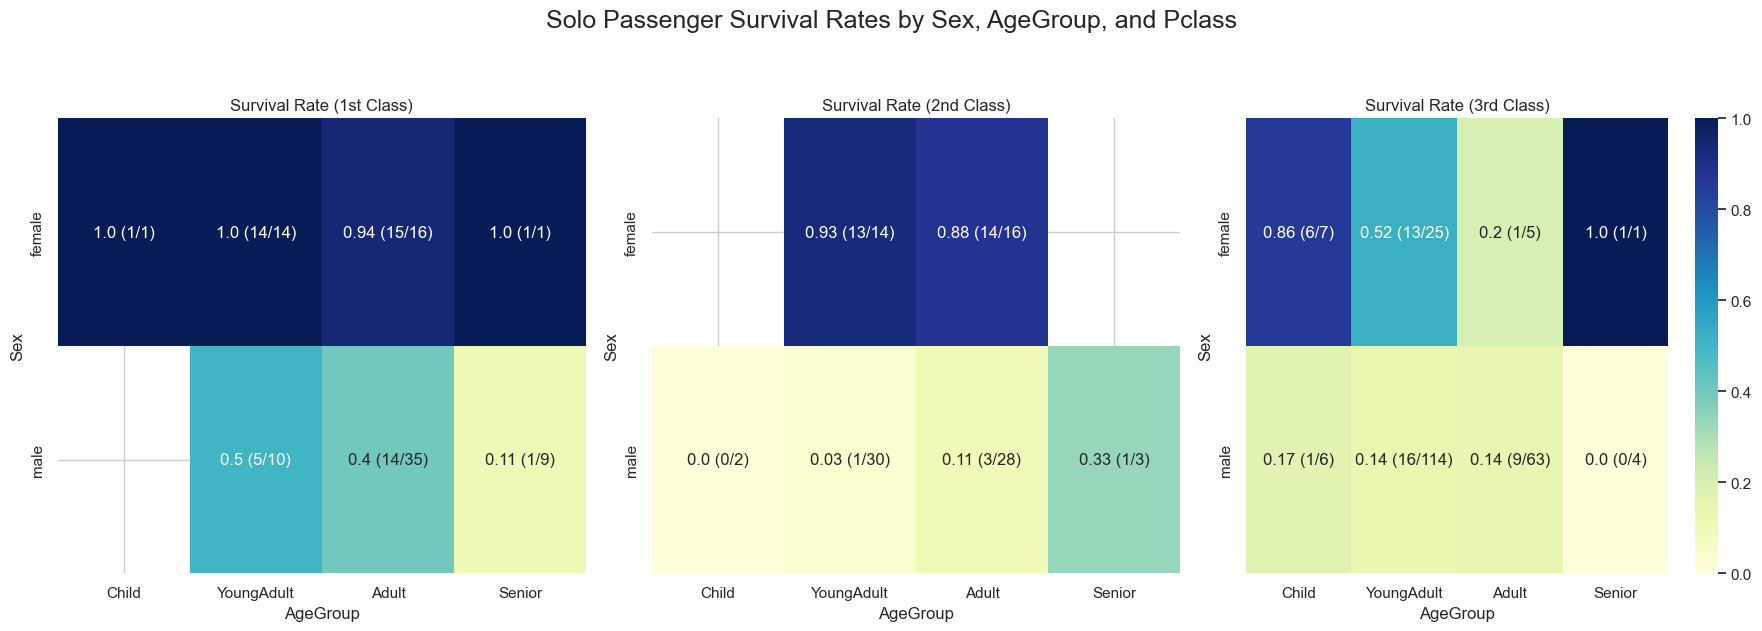

In [77]:
# [1] 파생 변수 추가
solo = df[df['FamilySize'] == 0].copy()
solo['AgeGroup'] = pd.cut(solo['Age'], bins=[0,16,30,60,100], labels=['Child','YoungAdult','Adult','Senior'])

# [2] 다중 그룹 집계 (Sex + AgeGroup + Pclass)
group_stats = solo.groupby(['Sex', 'AgeGroup', 'Pclass'])['Survived'].agg(['count', 'sum', 'mean']).reset_index()

# [3] 각 그룹별 텍스트 라벨 생성: 생존률 (생존자수/총인원수)
group_stats['label'] = group_stats['mean'].round(2).astype(str) + " (" + \
                       group_stats['sum'].astype(int).astype(str) + "/" + \
                       group_stats['count'].astype(int).astype(str) + ")"

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
pclass_labels = {1: "1st Class", 2: "2nd Class", 3: "3rd Class"}

for i, pclass in enumerate([1, 2, 3]):
    subset = group_stats[group_stats['Pclass'] == pclass]

    # Pivot 테이블로 시각화용 데이터 정리
    pivot_mean = subset.pivot(index='Sex', columns='AgeGroup', values='mean')
    pivot_label = subset.pivot(index='Sex', columns='AgeGroup', values='label')

    sns.heatmap(
        pivot_mean, annot=pivot_label, fmt="", cmap="YlGnBu",
        ax=axes[i], cbar=i==2,  # 마지막 서브플롯만 컬러바
        vmin=0, vmax=1
    )
    axes[i].set_title(f"Survival Rate ({pclass_labels[pclass]})")

plt.suptitle("Solo Passenger Survival Rates by Sex, AgeGroup, and Pclass", fontsize=18, y=1.05)
plt.tight_layout()
plt.savefig("assets/results2.png")
plt.show()

### 9-4. 선박 내 위치에 따른 생존률 분석

#### 📌 가설 정리
- **가설 1**: 선수(Cabin 번호 앞자리 낮음) 이용객이 후미(Cabin 번호 앞자리 높음) 이용객보다 생존률이 높다.
- **가설 2**: A Deck(선박 위쪽) 이용객이 G Deck(선박 아래쪽) 이용객보다 생존률이 높다.

#### ⚠️ 분석 한계
1. `Cabin` 변수의 결측치가 많아 전체 표본에 대한 일반화에는 무리가 있음.
2. 타이타닉 내부 구조도(객실 번호별 위치와 층수 등)가 정확히 공개되어 있지 않아 위치 해석에 제약이 있음.

In [78]:
# 1. 결측치 제거
valid_cabin = df['Cabin'].dropna()

# 2. 첫 글자(Deck) 추출
df['Deck'] = df['Cabin'].dropna().apply(lambda x: x[0])

# 3. Deck별 인원 수
deck_counts = df['Deck'].value_counts().sort_index()
print(deck_counts)
=

Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: count, dtype: int64
